## **Functions**

In [52]:
import shutil
from collections.abc import Sequence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylim([-0.3,0.4])
    plt.ylabel('output')
    plt.legend()
    plt.show() 


def to_sequences(seq_size, data1, data2):
    x = []
    y = []

    for i in range(len(data1)-seq_size):
        #print(i)
        window = data1[i:(i+seq_size)]
        after_window = data2[i+seq_size]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x), np.array(y)

## **Loading Data**

In [53]:
import numpy as np
import pandas as pd
import os
import io
import requests
import sklearn
from aeon.datasets import load_forecasting
from aeon.datasets import load_regression
X, y, meta_data = load_regression("Covid3Month")
print(" Shape of X = ", X.shape)
print(" Shape of y = ", y.shape)
print(" Meta data = ", meta_data)

 Shape of X =  (201, 1, 84)
 Shape of y =  (201,)
 Meta data =  {'problemname': 'covid3month', 'timestamps': False, 'missing': False, 'univariate': True, 'equallength': True, 'classlabel': False, 'targetlabel': True, 'class_values': []}


## **Splitting Data to Train and Test**

In [54]:
import numpy as np
import pandas as pd
import os
import io
import requests
import sklearn
from aeon.datasets import load_regression
X_train, y_train = load_regression(
    "Covid3Month", extract_path="./Temp/", split="TRAIN", return_metadata=False
)
X_test, y_test = load_regression(
    "Covid3Month", extract_path="./Temp/", split="test", return_metadata=False
)
print("Train shape = ", X_train.shape)
print("Test shape = ", X_test.shape)
print("Train shape = ", y_train.shape)
print("Test shape = ", y_test.shape)

Train shape =  (140, 1, 84)
Test shape =  (61, 1, 84)
Train shape =  (140,)
Test shape =  (61,)


In [55]:
X_train

array([[[  0.,   0.,   0., ...,   0.,   0.,  12.]],

       [[  0.,   0.,   0., ...,   9.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0., ...,  65.,  39.,  36.]],

       [[  0.,   0.,   0., ..., 128., 114.,  90.]],

       [[  0.,   0.,   0., ...,   4.,   7.,   5.]]])

In [56]:
y_train

array([0.        , 0.07758621, 0.        , 0.        , 0.15400309,
       0.05555556, 0.00467563, 0.02857143, 0.00805611, 0.04794211,
       0.07079646, 0.02558824, 0.00958466, 0.08068783, 0.1       ,
       0.        , 0.01089701, 0.06451613, 0.04054054, 0.02373339,
       0.02752294, 0.12765957, 0.06060606, 0.03533314, 0.00687285,
       0.06413938, 0.04545455, 0.08181818, 0.02567976, 0.04218472,
       0.02906287, 0.10318238, 0.07017544, 0.03276131, 0.11764706,
       0.0396734 , 0.09703504, 0.05594406, 0.01045296, 0.        ,
       0.03333333, 0.08394227, 0.00552975, 0.0164468 , 0.        ,
       0.        , 0.04715102, 0.        , 0.02777778, 0.01413428,
       0.11111111, 0.        , 0.04972376, 0.03846154, 0.06756757,
       0.06254257, 0.01162791, 0.04454685, 0.        , 0.02122016,
       0.17307692, 0.01754386, 0.04449649, 0.01569078, 0.        ,
       0.        , 0.        , 0.        , 0.03159324, 0.01886792,
       0.075     , 0.        , 0.00993491, 0.00958216, 0.11111

In [57]:
X_train.dtype

dtype('float64')

## **Normalization**

In [58]:
# convert to float32 for normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



In [59]:

# normalize the data values to the range [0, 1]
X_train /= 255
X_test /= 255

## **Sequencing Data**

In [60]:
SEQUENCE_SIZE = 10

X_train, y_train= to_sequences(SEQUENCE_SIZE, X_train, y_train)
X_test, y_test = to_sequences(SEQUENCE_SIZE, X_test, y_test)

print("Shape of x_train: {}".format(X_train.shape))
print("Shape of x_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

X_train = X_train.reshape((X_train.shape[0], SEQUENCE_SIZE, X_train.shape[3] * X_train.shape[4]))
X_test = X_test.reshape((X_test.shape[0], SEQUENCE_SIZE, X_test.shape[3] * X_test.shape[4]))

print("Shape of x_train: {}".format(X_train.shape))
print("Shape of x_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (130, 10, 1, 1, 84)
Shape of x_test: (51, 10, 1, 1, 84)
Shape of y_train: (130,)
Shape of y_test: (51,)
Shape of x_train: (130, 10, 84)
Shape of x_test: (51, 10, 84)
Shape of y_train: (130,)
Shape of y_test: (51,)


## **Building LSTM Regression Model (Relu & Adam)**

Epoch 1/100
5/5 - 2s - loss: 0.0039 - accuracy: 0.2000 - val_loss: 0.0025 - val_accuracy: 0.2157 - 2s/epoch - 404ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0020 - accuracy: 0.2000 - val_loss: 0.0024 - val_accuracy: 0.2157 - 84ms/epoch - 17ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0018 - accuracy: 0.2000 - val_loss: 0.0025 - val_accuracy: 0.2157 - 98ms/epoch - 20ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0017 - accuracy: 0.2000 - val_loss: 0.0026 - val_accuracy: 0.2157 - 95ms/epoch - 19ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0017 - accuracy: 0.2000 - val_loss: 0.0027 - val_accuracy: 0.2157 - 95ms/epoch - 19ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0018 - accuracy: 0.2000 - val_loss: 0.0027 - val_accuracy: 0.2157 - 97ms/epoch - 19ms/step
Epoch 6: early stopping
5/5 [==============================] - 0s 2ms/step
Score_train (RMSE): 0.039616888268555465
2/2 [==============================] - 0s 2ms/step
Score_test (RMSE): 0.04933893605972453


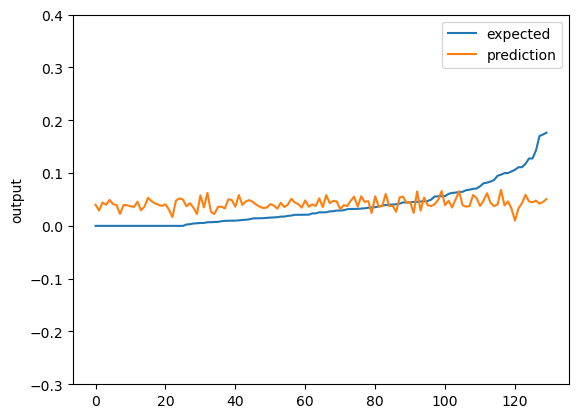

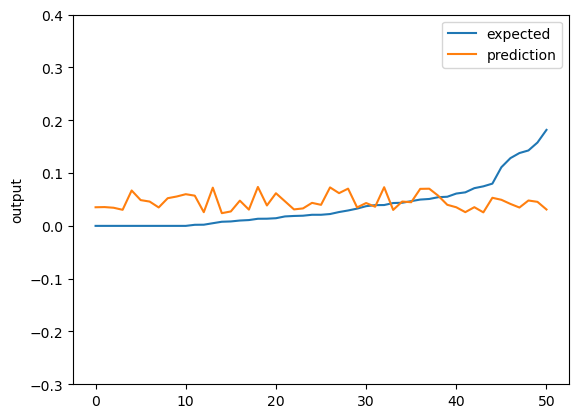

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import metrics


model = Sequential()
model.add(LSTM(128, activation='tanh', dropout=0.2, recurrent_dropout=0.2, input_shape=(10, X_train.shape[2]), return_sequences = True))
model.add(LSTM(64, dropout = 0.1, recurrent_dropout = 0.1, input_shape = (10, X_train.shape[2])))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,  beta_1=0.9, beta_2=0.999, epsilon=None,amsgrad=False),
              metrics =["accuracy"])

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)


model.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks = [monitor, checkpointer], verbose = 2, epochs = 100)

model.load_weights('best_weights_NN.hdf5')  

pred_train = model.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))

# Chart_regression
chart_regression(pred_train.flatten(), y_train, sort = True)
chart_regression(pred_test.flatten(), y_test, sort = True)


## **Building LSTM Regression Model (Relu & SGD)**

Epoch 1/100
5/5 - 2s - loss: 0.0022 - accuracy: 0.2000 - val_loss: 0.0033 - val_accuracy: 0.2157 - 2s/epoch - 460ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0023 - accuracy: 0.2000 - val_loss: 0.0033 - val_accuracy: 0.2157 - 72ms/epoch - 14ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0022 - accuracy: 0.2000 - val_loss: 0.0033 - val_accuracy: 0.2157 - 105ms/epoch - 21ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0020 - accuracy: 0.2000 - val_loss: 0.0033 - val_accuracy: 0.2157 - 135ms/epoch - 27ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0026 - accuracy: 0.2000 - val_loss: 0.0033 - val_accuracy: 0.2157 - 106ms/epoch - 21ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0021 - accuracy: 0.2000 - val_loss: 0.0033 - val_accuracy: 0.2157 - 100ms/epoch - 20ms/step
Epoch 6: early stopping
5/5 [==============================] - 0s 2ms/step
Score_train (RMSE): 0.04345067154158288
2/2 [==============================] - 0s 3ms/step
Score_test (RMSE): 0.05778622840695428


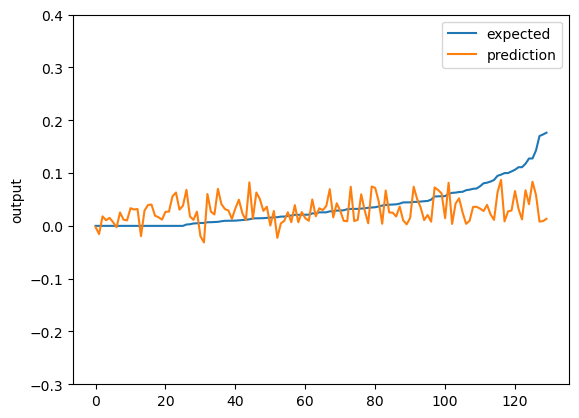

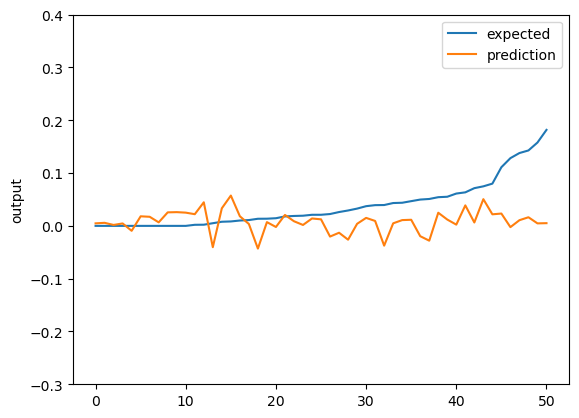

In [62]:
model = Sequential()
model.add(LSTM(128, activation='tanh', dropout=0.2, recurrent_dropout=0.2, input_shape=(10, X_train.shape[2]), return_sequences = True))
model.add(LSTM(64, dropout = 0.1, recurrent_dropout = 0.1, input_shape = (10, X_train.shape[2])))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', 
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, nesterov=True),
              metrics =["accuracy"])

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)


model.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks = [monitor, checkpointer], verbose = 2, epochs = 100)

model.load_weights('best_weights_NN.hdf5')  

pred_train = model.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))

# Chart_regression
chart_regression(pred_train.flatten(), y_train, sort = True)
chart_regression(pred_test.flatten(), y_test, sort = True)



## **Building LSTM Regression Model (tanh & Adam)**

Epoch 1/100
5/5 - 2s - loss: 0.0065 - accuracy: 0.2000 - val_loss: 0.0031 - val_accuracy: 0.2157 - 2s/epoch - 435ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0029 - accuracy: 0.2000 - val_loss: 0.0035 - val_accuracy: 0.2157 - 73ms/epoch - 15ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0027 - accuracy: 0.2000 - val_loss: 0.0040 - val_accuracy: 0.2157 - 105ms/epoch - 21ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0028 - accuracy: 0.2000 - val_loss: 0.0034 - val_accuracy: 0.2157 - 102ms/epoch - 20ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0029 - accuracy: 0.2000 - val_loss: 0.0022 - val_accuracy: 0.2157 - 117ms/epoch - 23ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0020 - accuracy: 0.2000 - val_loss: 0.0026 - val_accuracy: 0.2157 - 100ms/epoch - 20ms/step
Epoch 6: early stopping
5/5 [==============================] - 0s 2ms/step
Score_train (RMSE): 0.04099293802152603
2/2 [==============================] - 0s 2ms/step
Score_test (RMSE): 0.04723815530890871


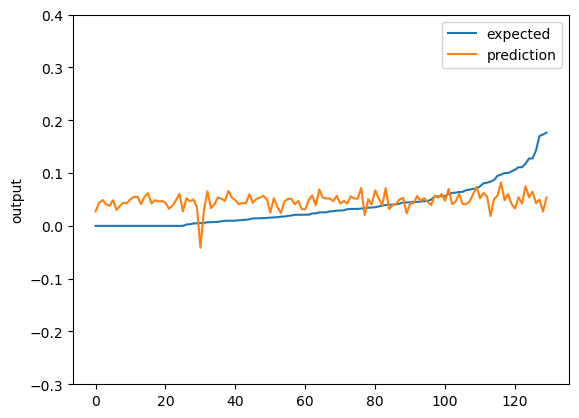

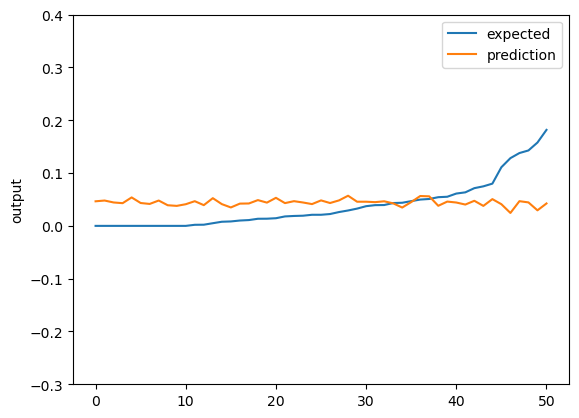

In [63]:
model = Sequential()
model.add(LSTM(128, activation='tanh', dropout=0.2, recurrent_dropout=0.2, input_shape=(10, X_train.shape[2]), return_sequences = True))
model.add(LSTM(64, dropout = 0.1, recurrent_dropout = 0.1, input_shape = (10, X_train.shape[2])))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,  beta_1=0.9, beta_2=0.999, epsilon=None,amsgrad=False),
              metrics =["accuracy"])

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)


model.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks = [monitor, checkpointer], verbose = 2, epochs = 100)

model.load_weights('best_weights_NN.hdf5')  

pred_train = model.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))

# Chart_regression
chart_regression(pred_train.flatten(), y_train, sort = True)
chart_regression(pred_test.flatten(), y_test, sort = True)



## **Building LSTM Regression Model (tanh & SGD)**

Epoch 1/100
5/5 - 2s - loss: 0.0045 - accuracy: 0.2000 - val_loss: 0.0066 - val_accuracy: 0.2157 - 2s/epoch - 493ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0035 - accuracy: 0.2000 - val_loss: 0.0066 - val_accuracy: 0.2157 - 73ms/epoch - 15ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0048 - accuracy: 0.2000 - val_loss: 0.0066 - val_accuracy: 0.2157 - 101ms/epoch - 20ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0036 - accuracy: 0.2000 - val_loss: 0.0066 - val_accuracy: 0.2157 - 100ms/epoch - 20ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0044 - accuracy: 0.2000 - val_loss: 0.0066 - val_accuracy: 0.2157 - 105ms/epoch - 21ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0039 - accuracy: 0.2000 - val_loss: 0.0066 - val_accuracy: 0.2157 - 108ms/epoch - 22ms/step
Epoch 6: early stopping
5/5 [==============================] - 0s 2ms/step
Score_train (RMSE): 0.05066281478358602
2/2 [==============================] - 0s 3ms/step
Score_test (RMSE): 0.08115062900184458


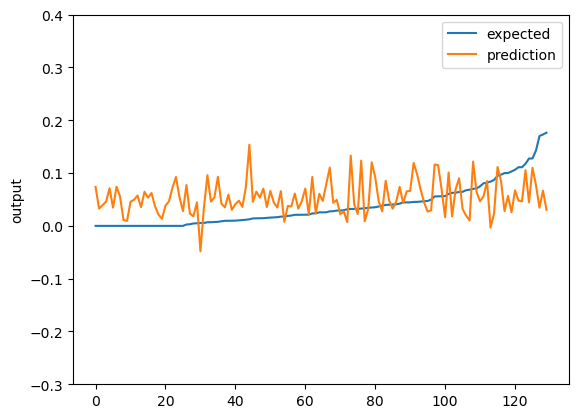

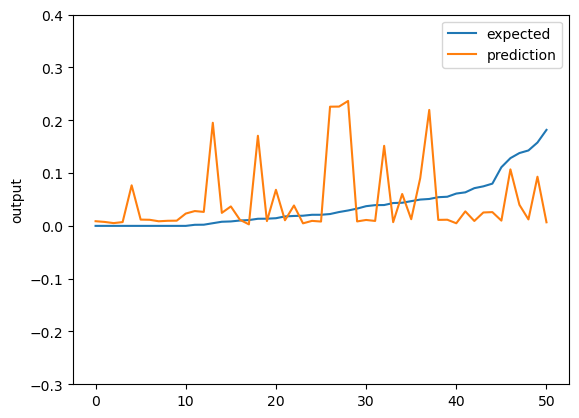

In [64]:
model = Sequential()
model.add(LSTM(128, activation='tanh', dropout=0.2, recurrent_dropout=0.2, input_shape=(10, X_train.shape[2]), return_sequences = True))
model.add(LSTM(64, dropout = 0.1, recurrent_dropout = 0.1, input_shape = (10, X_train.shape[2])))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', 
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, nesterov=True),
              metrics =["accuracy"])

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)


model.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks = [monitor, checkpointer], verbose = 2, epochs = 100)

model.load_weights('best_weights_NN.hdf5')  

pred_train = model.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))

# Chart_regression
chart_regression(pred_train.flatten(), y_train, sort = True)
chart_regression(pred_test.flatten(), y_test, sort = True)

